
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [88]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [89]:
import sklearn
sklearn.__version__

'1.0.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [90]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

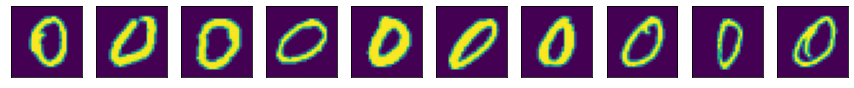

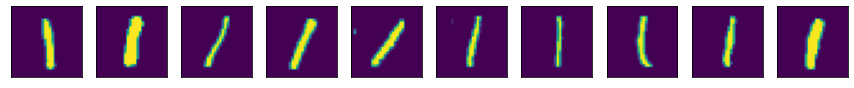

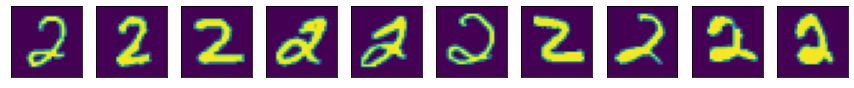

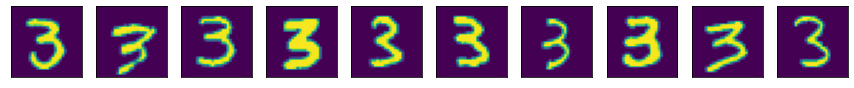

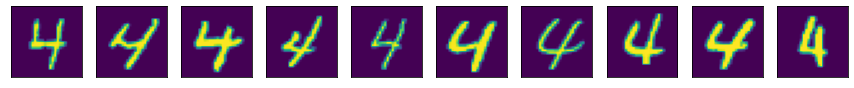

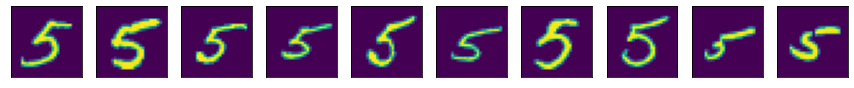

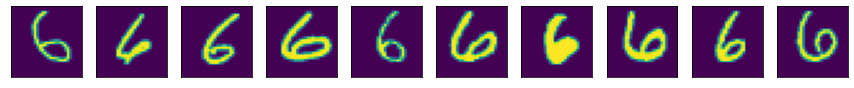

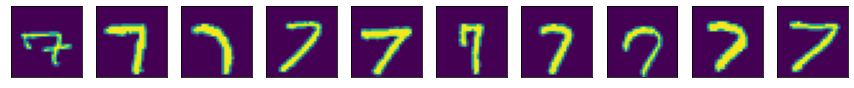

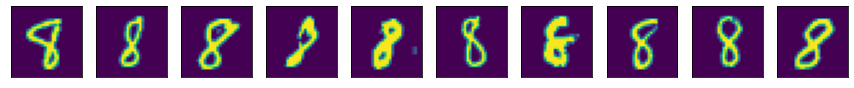

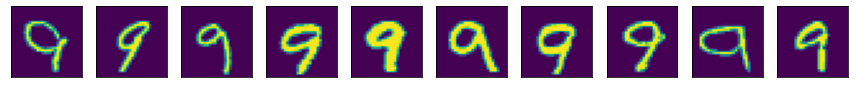

In [91]:
def Q1(num_examples=10):

  ### STUDENT START ###

  # This stanza builds an empty dictionary that will store indices of digits in
  # a given datset. The dictionary is initialized with count 0 for all digits.
  labels = list(map(str, range(10)))
  digit_dictionary = dict()
  count = [0,0,0,0,0,0,0,0,0,0] 
  for i in range(len(labels)):
    digit_dictionary[labels[i]] = list()

  # This stanza loops through the train_data dataset and collates indices of 
  # each digit in the dictionary. The loop completes when 10 indices are found
  # for each digit (0-9). 
  for i in range(10000): 
    X = train_labels.iloc[i]
    if (count[int(X)]<10):
      digit_dictionary[X].append(i)
      count[int(X)] += 1

  # This stanza uses the collated digit_dictionary to create a 10x10 matrix
  # of each digit (0-9). The grid markings are removed for visualization.
  for i in range(10):
    grid = plt.figure(figsize=(15,15))
    for j in range(10):
      digit_grid = train_data.values[digit_dictionary[str(i)][j]].reshape(28,28) 
      grid.add_subplot(1,10,j+1) 
      plt.xticks([])
      plt.yticks([])
      plt.imshow(digit_grid)

  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [92]:
def Q2(k_values):

  ### STUDENT START ###

  # This stanza produces a KNN model based on values defined by k_values. The
  # model is trained using the mini_train_data dataset while performance is
  # evaluated using the dev_data dataset. The resulting accuracies are printed
  # with the corresponding k values for analysis. 
  print("--- Model Accuracy ---")
  print()
  for i in k_values:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(mini_train_data, mini_train_labels)
    prediction = knn.predict(dev_data)
    print("K =", i, "Accuracy ->", knn.score(dev_data, dev_labels))

  # This stanza produces a KNN model for k=1. The model is trained using the 
  # mini_train_data dataset while performance is evaluated using the dev_data
  # dataset. The results are displayed using the classification_report method.
  print()
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(mini_train_data, mini_train_labels)
  prediction = knn.predict(dev_data)
  print("------------- Classification Report (k=1) -------------")
  print()
  print(classification_report(dev_labels,prediction)) 

  ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

--- Model Accuracy ---

K = 1 Accuracy -> 0.884
K = 3 Accuracy -> 0.876
K = 5 Accuracy -> 0.882
K = 7 Accuracy -> 0.877
K = 9 Accuracy -> 0.875

------------- Classification Report (k=1) -------------

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



**Answer to part 4:** Based on the results of the classification report, the digit '9' is the most difficult for a 1-Nearest Neighbor model to classify correctly. The digit was chosen because it had the lowest 'Precision' score of 0.8, which is the lowest of all other digits. A low precision value means the model has difficulty in accurately classifying a digit within a given dataset. 


### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

---------------------- Data Size vs. Model Accuracy vs. Training Time ----------------------

Data Size: 100   	 Model Accuracy: 0.702      	 Training Time: 0.01510477066040039
Data Size: 200   	 Model Accuracy: 0.791      	 Training Time: 0.01379704475402832
Data Size: 400   	 Model Accuracy: 0.811      	 Training Time: 0.015491247177124023
Data Size: 800   	 Model Accuracy: 0.866      	 Training Time: 0.016246557235717773
Data Size: 1600   	 Model Accuracy: 0.905      	 Training Time: 0.01953601837158203
Data Size: 3200   	 Model Accuracy: 0.927      	 Training Time: 0.022709369659423828
Data Size: 6400   	 Model Accuracy: 0.939      	 Training Time: 0.03660440444946289
Data Size: 12800   	 Model Accuracy: 0.952      	 Training Time: 0.03514909744262695
Data Size: 25600   	 Model Accuracy: 0.963      	 Training Time: 0.05491495132446289

----- Training Time vs. Evaluation Time -----



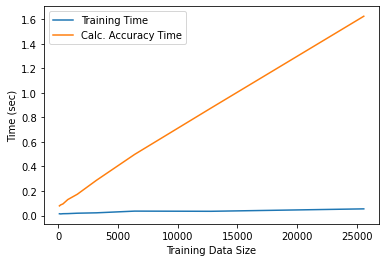

In [112]:
def Q3(train_sizes):

  ### STUDENT START ###

  # This stanza produces a 1-Nearest Neighbor Model using multiple training
  # data sizes defined in the train_sizes list. 
  for train_size in train_sizes:
    knn = KNeighborsClassifier(n_neighbors = 1)

    # This stanza calculates time required to train a model. Size of data comes
    # from the train_data data set. Values are stored in train_times list.
    start_time = time.time()
    knn.fit(train_data[:train_size], train_labels[:train_size])
    stop_time = time.time()
    train_times.append(stop_time - start_time)

    # This stanza calculates  time required to determine the accuracy of 
    # a model. Times are stored in eval_times list and accuracies / scores 
    # are stored in the accuracies list. 
    start_time = time.time()
    accuracy = knn.score(dev_data, dev_labels)
    stop_time = time.time()
    eval_times.append(stop_time - start_time)
    accuracies.append(accuracy)

  # This stanza prints the accuracy and training times given the training data
  # sizes in the train_sizes list. 
  print("---------------------- Data Size vs. Model Accuracy vs. Training Time ----------------------")
  print()
  elements = len(train_sizes)
  for i in range(elements):
    print("Data Size:", train_sizes[i], "  \t Model Accuracy:", accuracies[i], "     \t Training Time:", train_times[i])

  # This stanza creates a plot of the training and evaluation times as a
  # function of training data sizes. 
  print()
  print("----- Training Time vs. Evaluation Time -----")
  print()
  plt.plot(train_sizes, train_times, label = "Training Time")
  plt.plot(train_sizes, eval_times, label = "Calc. Accuracy Time")
  plt.xlabel("Training Data Size", fontsize = 10)
  plt.ylabel("Time (sec)", fontsize = 10)
  plt.legend()
  plt.show()

  ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes)

**Answer to part 4:** There is a minimum amount of data required before a model can generalize and make reasonable predictions on new data. However, there is also a cost associated with having too much training data that follows a logarithmic pattern. Once a model has achieved a reasonable accuracy (i.e. say, 95%), we observe only incremental improvements in accuracy, even when large amounts of additional data are included in the training dataset. Though I've generally assumed that more data means improved accuracy, the observations from this example also make sense, and the take away is a need to balance training data sizes with accuracy score and resource utilization.


### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

[Question 2] -> R^2 (No Transformations): 0.4177006634161019
[Question 7] -> R^2 (With Transformations): 0.9395242859897991
[Question 3] -> Prediction (no transformations) for 60,000: [1.23617317] ; for 120,000: [1.63742805] ; for 1,000,000: [7.52249967]
[Question 8] -> Prediction (with transformations) for 60,000: [0.99999595] ; for 120,000: [0.99999798] ; for 1,000,000: [0.99999976]
[Question 4] -> Plot (No Transformation)



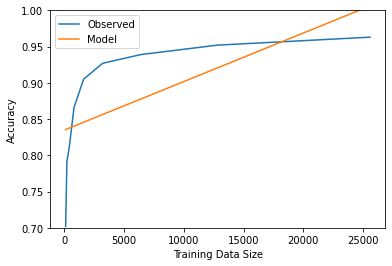


[Question 9] -> Plot (Log Transform Input / Odds Transform Output)



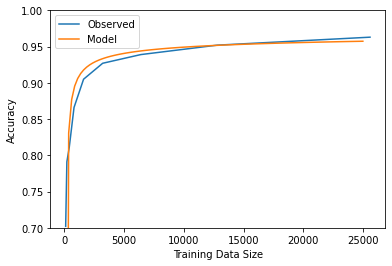

In [94]:
def Q4(train_sizes,accuracies):

  ### STUDENT START ###

  # This stanza creates two lamba functions: (1) convert probabilities to 
  # odds and (2) convert odds to probabilities. The conversions will be used  
  # for subsequent transformations. 
  prob_to_odds = lambda x: x / (1.0 - x)  # [0,1] -> [0, inf]
  odds_to_prob = lambda x: x / (1.0 + x)  # [0, inf] -> [0, 1]

  # Comment
  x_sizes = np.array(train_sizes)[:, np.newaxis]
  y_oddsaccuracies = np.array(list(map(prob_to_odds, accuracies)))
  x_logsizes = np.array(np.log(train_sizes))[:, np.newaxis]

  # This stanza creates two linear regression models: (1) a model without
  # transformations on the training data size and corresponding accuracies,
  # and (2) a model with a logarithmic transformation applied to the training
  # data size and probability to odds transformation to the accuracies.
  lr1_r1 = LinearRegression()
  lr2_r1 = LinearRegression()
  lr1_r1.fit(x_sizes, accuracies)
  lr2_r1.fit(x_logsizes, y_oddsaccuracies)

  # This stanza calculates the R^2 value for the non-transformed and the
  # transformed linear regression model. The results are printed in response
  # to questions 2 and 7. 
  lr1_r2 = lr1_r1.score(x_sizes, accuracies)
  lr2_r2 = lr2_r1.score(x_logsizes, y_oddsaccuracies)
  print("[Question 2] -> R^2 (No Transformations):", lr1_r2)
  print("[Question 7] -> R^2 (With Transformations):", lr2_r2)

  # This stanza uses the non-transformed linear regression model to predict the
  # models accuracy, given three large training data sizes. The results of the
  # prediction are printed in response to question 3. 
  lr1_prediction = []
  lr1_prediction.append(lr1_r1.predict(np.array(60000).reshape(1,1)))
  lr1_prediction.append(lr1_r1.predict(np.array(120000).reshape(1,1)))
  lr1_prediction.append(lr1_r1.predict(np.array(1000000).reshape(1,1)))
  print("[Question 3] -> Prediction (no transformations) for 60,000:", lr1_prediction[0], "; for 120,000:", lr1_prediction[1], "; for 1,000,000:", lr1_prediction[2])

  # This stanza uses the transformed linear regression model to predict the 
  # models accuracy, given three large training data sizes. The results of the 
  # prediction are printed in response to question 8. 
  lr2_prediction = []
  lr2_prediction.append(odds_to_prob(lr2_r1.predict(np.array(60000).reshape(1,1))))
  lr2_prediction.append(odds_to_prob(lr2_r1.predict(np.array(120000).reshape(1,1))))
  lr2_prediction.append(odds_to_prob(lr2_r1.predict(np.array(1000000).reshape(1,1))))
  print("[Question 8] -> Prediction (with transformations) for 60,000:", lr2_prediction[0], "; for 120,000:", lr2_prediction[1], "; for 1,000,000:", lr2_prediction[2])

  # This stanza creates a list of predictions given train_sizes. The results
  # are used in the subsequent sections for plotting predictions in graph.
  lr1_prediction_model = [] 
  for i in train_sizes:
    lr1_prediction_model.append(lr1_r1.predict(np.array(i).reshape(1,1)))

  # This stanza plots the results of a non-transformed linear regression model
  # with the actual observed accuracy. 
  print('[Question 4] -> Plot (No Transformation)')
  print()
  plt.figure()
  x_values = np.linspace(100, 25000, 100)
  plt.plot(train_sizes,accuracies, label='Observed')
  plt.plot(train_sizes,lr1_prediction_model,label='Model') 
  plt.xlabel("Training Data Size", fontsize = 10)
  plt.ylabel("Accuracy", fontsize = 10)
  plt.ylim(0.7,1.0)
  plt.legend()
  plt.show()
  print()

  # This stanza plots the results of a transformed linear regression model
  # with the actual observed accuracy. 
  print("[Question 9] -> Plot (Log Transform Input / Odds Transform Output)")
  print()
  plt.figure()
  x_values = np.linspace(100, 25000, 100)
  plt.plot(train_sizes,accuracies, label='Observed')
  plt.plot(x_values, odds_to_prob(lr2_r1.predict(np.log(x_values)[:, np.newaxis])), label='Model')  
  plt.xlabel("Training Data Size", fontsize = 10)
  plt.ylabel("Accuracy", fontsize = 10)
  plt.ylim(0.7,1.0)
  plt.legend()
  plt.show()

  ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
Q4(train_sizes,accuracies)

**Answer to part 5:** The two things wrong with the model are: (1) The linear regression model shows predictions of 1.23 (for 60,000), 1.63 (for 120,000) and 7.5 (for 1,000,000), which are invalid, as probabilities must be values between [0,1]. (2) There also does not appear to be a strong correlation between data size and accuracy - as an example, giving a model near infinit amount of training data does not guarantee a model that can predict any digit correcty 100% of the time. 

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

------------ Confusion Matrix ------------

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

------- Confused Digits -------

Most Confused Digits: 4 and 9



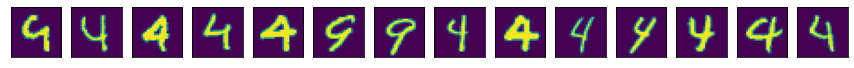

In [95]:
def Q5():
  
  ### STUDENT START ###

  # This stanza creates a list of digits (0-9) and produces a 
  # 1-Nearest Neighbor model using the mini_train_data dataset. 
  # The model is evaluated using the dev_data dataset, with the 
  # prediction results displayed in a confusion matrix. 
  labels = list(map(str, range(10)))
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(mini_train_data, mini_train_labels)
  prediction = knn.predict(dev_data)
  cm = confusion_matrix(dev_labels, prediction, labels=labels)
  print("------------ Confusion Matrix ------------")
  print()
  print(cm)

  # This stanza iterates through the confusion matrix in order to
  # identify the digit pairs that got most confused. The values are
  # stored in variables 'r' and 'c', and are used in the section
  # below to reconstruct and plot an example of a confused digit pair.
  error = 0
  r = 0
  c = 0
  for i in range(len(labels)):
    for j in range(i+1, len(labels)):
      tmp = cm[i][j] + cm[j][i]
      if (tmp > error):
        error = tmp
        r = i 
        c = j
  print()
  print("------- Confused Digits -------")
  print()
  print("Most Confused Digits:", r , 'and' , c)
  print()
  
  # This stanza builds on the stanza above. Given the digits that were
  # most confused, we identify the index values of those digits and
  # store in variable so we can plot in the following section below.
  most_confused = dev_data[np.logical_or(np.logical_and(knn.predict(dev_data)==str(c), dev_labels==str(r)),np.logical_and(knn.predict(dev_data)==str(r), dev_labels==str(c)))]
  
  # This stanza plots all the digit pairs that were most confused.
  plt.figure(figsize=(15,15))
  for i in range(len(most_confused)):
    array = most_confused.values[i].reshape(28,28)
    plt.subplot(1,len(most_confused),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(array)
  
  ### STUDENT END ###

Q5()

**Answer to part 3:** The results of the Confusion Matrix show that digits '4' and '9' are most confused (there were 11+3 or 14 instances where the digits '4' and '9' were confused, which is higher than any other pair of digits). When plotting all examples where the digits '4' and '9' were confused, we can visually confirm why our model confused these digits (I would confuse them as well!).

# **Citations and Resources:**



1.   Collaborated with Satya Srinivas and CB Bangalore.
2.   https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
3.   https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
4.  learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 
5.  https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis
